In [1]:
using LinearAlgebra,  Plots;gr() #PlotlyJS#

Plots.GRBackend()

In [2]:
# Define data
x = range(-2,2,length=401) #  spatial coordinate !!
Nx = size(x,1)

amp1 = 1
x01 = 0.5
sigmay1 = 0.6

amp2 = 1.2
x02 = -0.5
sigmay2 = 0.3

dt = 0.01
Nt = 1001
tend = dt*(Nt-1)
t = range(0,tend,length=Nt) # time

omega1 = 1.3
omega2 = 4.1

y1 = amp1*exp.(-((x.-x01).^2)/(2*sigmay1^2))
y2 = amp2*exp.(-((x.-x02).^2)/(2*sigmay2^2));

In [3]:
Y = zeros(Nx,Nt)
j=1
for tt in t
    Y[:,j] = y1*sin(2*pi*omega1*tt) + y2*sin(2*pi*omega2*tt)
    j+=1
end

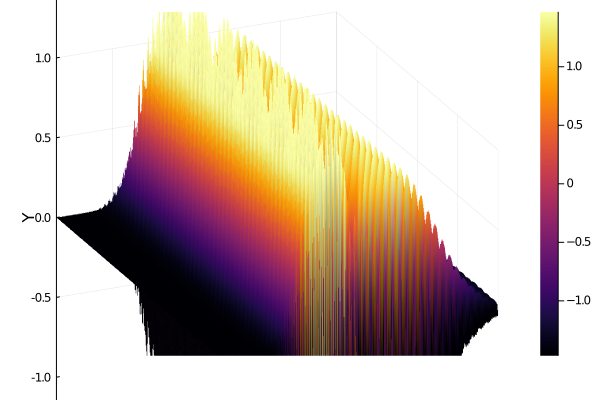

In [4]:
my_cg = cgrad([:blue, :yellow])
plot(x,t,Y,st = :surface, xaxis="spatial x", yaxis="time t",zaxis="Y",camera = (-45, 45))

In [ ]:
#= trace=PlotlyJS.surface(x=x,y=t,z=Y, colorscale="Viridis")
layout=Layout(title="interactive plot")
plot(trace,layout) =#

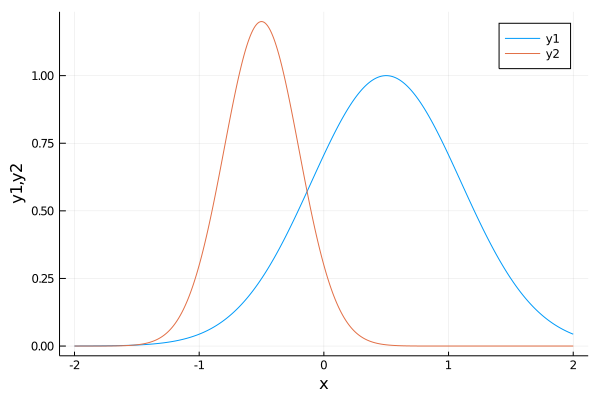

In [5]:
plot(x,y1)
plot!(x,y2,xlabel="x",ylabel="y1,y2")

In [ ]:
# plot(x,t,abs.(Y),ylim=(0,3))

In [6]:
Z=svd(Y)

SVD{Float64,Float64,Array{Float64,2}}
U factor:
401×401 Array{Float64,2}:
 -1.34773e-5  -1.05037e-5  -8.97064e-6   …   9.38399e-9   -5.13479e-5
 -1.44668e-5  -1.12037e-5  -6.41834e-6      -0.0821576    -3.78309e-5
 -1.55268e-5  -1.19414e-5  -3.48883e-6       0.0331595    -2.90096e-5
 -1.66623e-5  -1.27178e-5   2.85625e-5       0.135478     -1.42173e-5
 -1.78787e-5  -1.35332e-5  -2.80596e-5      -0.0533664    -6.39992e-5
 -1.9182e-5   -1.43883e-5  -5.58427e-5   …  -0.151219     -9.1839e-5
 -2.05783e-5  -1.5283e-5    2.44156e-5       0.236781     -2.28575e-5
 -2.20745e-5  -1.62171e-5   1.54996e-5      -0.400107     -3.56433e-5
 -2.36779e-5  -1.71898e-5  -3.73806e-6       0.0421278    -5.95904e-5
 -2.53964e-5  -1.82001e-5  -4.28142e-5      -0.134791     -9.12725e-5
 -2.72386e-5  -1.92461e-5  -9.58785e-7   …  -0.291158     -6.0899e-5
 -2.92138e-5  -2.03255e-5   9.19983e-5       0.496077      2.13885e-5
 -3.1332e-5   -2.14349e-5  -5.54719e-5       0.306478     -0.000117493
  ⋮              

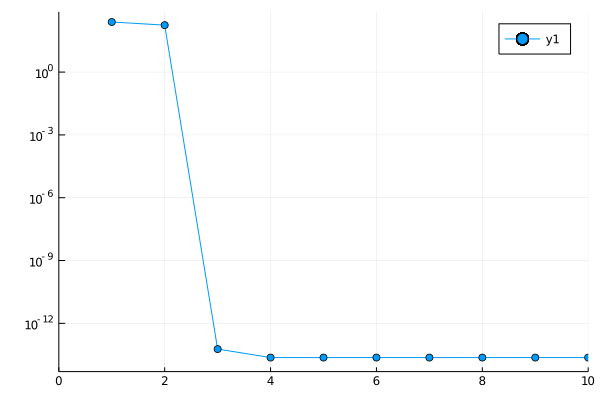

In [7]:
plot(Z.S, yaxis=:log, xlim=(0,10),shape =:circle)

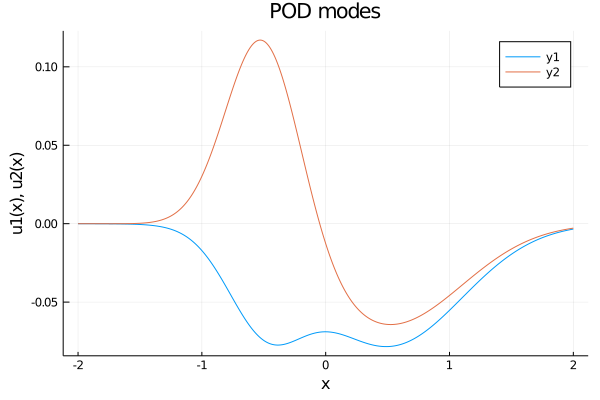

In [8]:
plot(x,Z.U[:,1])
plot!(x,Z.U[:,2])
xlabel!("x")
ylabel!("u1(x), u2(x)")
title!("POD modes")

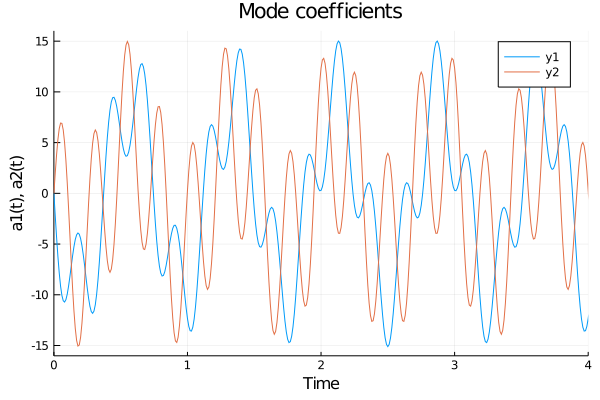

In [9]:
plot(t,Z.S[1]*Z.Vt[1,:],xlim=(0, 4))
plot!(t,Z.S[1]*Z.Vt[2,:],xlim=(0, 4))
xlabel!("Time")
ylabel!("a1(t), a2(t)")
title!("Mode coefficients")

In [ ]:
# Run spectral POD (which here is just a Fourier Transform, as the data is deterministic)
# Note that this requires sufficient resolution in time, and enough snapshots

# Take Fourier transform in time
Yft = np.zeros_like(Y,dtype='complex_')

for j in range(Y.shape[0]):
    Yft[j,:] = np.fft.fft(Y[j,:])
    
freq = np.fft.fftfreq(Nt,d=dt)
plt.contour(x,freq,np.transpose(np.abs(Yft)))
plt.xlabel('x', fontsize=18)
plt.ylabel('frequency (rad/s)', fontsize=18)
plt.title('Spectral content', fontsize=18)
plt.ylim(0,6);

In [ ]:
# Identify indices corresponding to input frequencies
# (we could also find these from the peaks in the above plot if we didn't know these)
ind1 = (np.abs(omega1 - freq)).argmin() 
ind2 = (np.abs(omega2 - freq)).argmin() 
print(freq[ind1])
print(freq[ind2])
plt.plot(x,np.abs(Yft[:,ind1]))
plt.plot(x,np.abs(Yft[:,ind2]))
plt.xlabel('y', fontsize=18)
plt.title('Spectral POD modes');

In [ ]:
# Try DMD instead (Note this doesn't work without time delays or complex data)
A = Y[:,1:Nt-1]@linalg.pinv(Y[:,2:Nt])
#A = np.dot((ModeCoeffs[1:np.shape(ModeCoeffs)[1],0:r]).T,(la.pinv(ModeCoeffs[0:(np.shape(ModeCoeffs)[1]-1),0:r])).T)

Lambda, W = np.linalg.eig(A)
LambdaCts = np.log(Lambda[:2])/(dt)

plt.plot(x,np.real(W[:,0]))
plt.plot(x,np.real(W[:,1]))
plt.xlabel('x', fontsize=18)
print(LambdaCts) # incorrect, since we need four independent components to define two frequencies